# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [26]:
#!wget https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip && unzip traffic-signs-data.zip

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

import os

training_file = './data/train.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
from IPython.display import display as display
from IPython.core.pylabtools import figsize, getfigs
import math
import matplotlib.image as mpimg
import matplotlib.transforms as mtransforms
import numpy as np
import cv2

In [5]:
with open('./signnames.csv', 'r') as signnames:
    class_defs = [line.strip().split(',') for line in signnames]
    
class_def_map = dict(class_defs)

In [6]:
def draw_multiple(images, title, cols = 2):
    """ Draw multiple images with a title. """
    plt.close('all')
    plt.axis('off')
    rows = math.ceil(len(images)/cols)
    f, axarr = plt.subplots(rows, cols, sharex='col', sharey='row')
    DPI = f.get_dpi() / 4
    f.set_size_inches(images[0].shape[1]*cols/float(DPI), images[0].shape[0]*rows/float(DPI))
    for i in range(len(images)):
        col = i % cols
        row = math.floor(i / cols)
        axarr[row, col].imshow(images[i], cmap='gray')
        axarr[row, col].axis('off')
    f.suptitle(title)
    f.subplots_adjust(hspace=0)
    display(f)
    plt.close(f)
    
def draw(img, title):
    """ Draw a single image with a title """
    f = plt.figure()
    plt.title(title)
    plt.imshow(img, cmap='gray')
    display(f)
    plt.close(f)


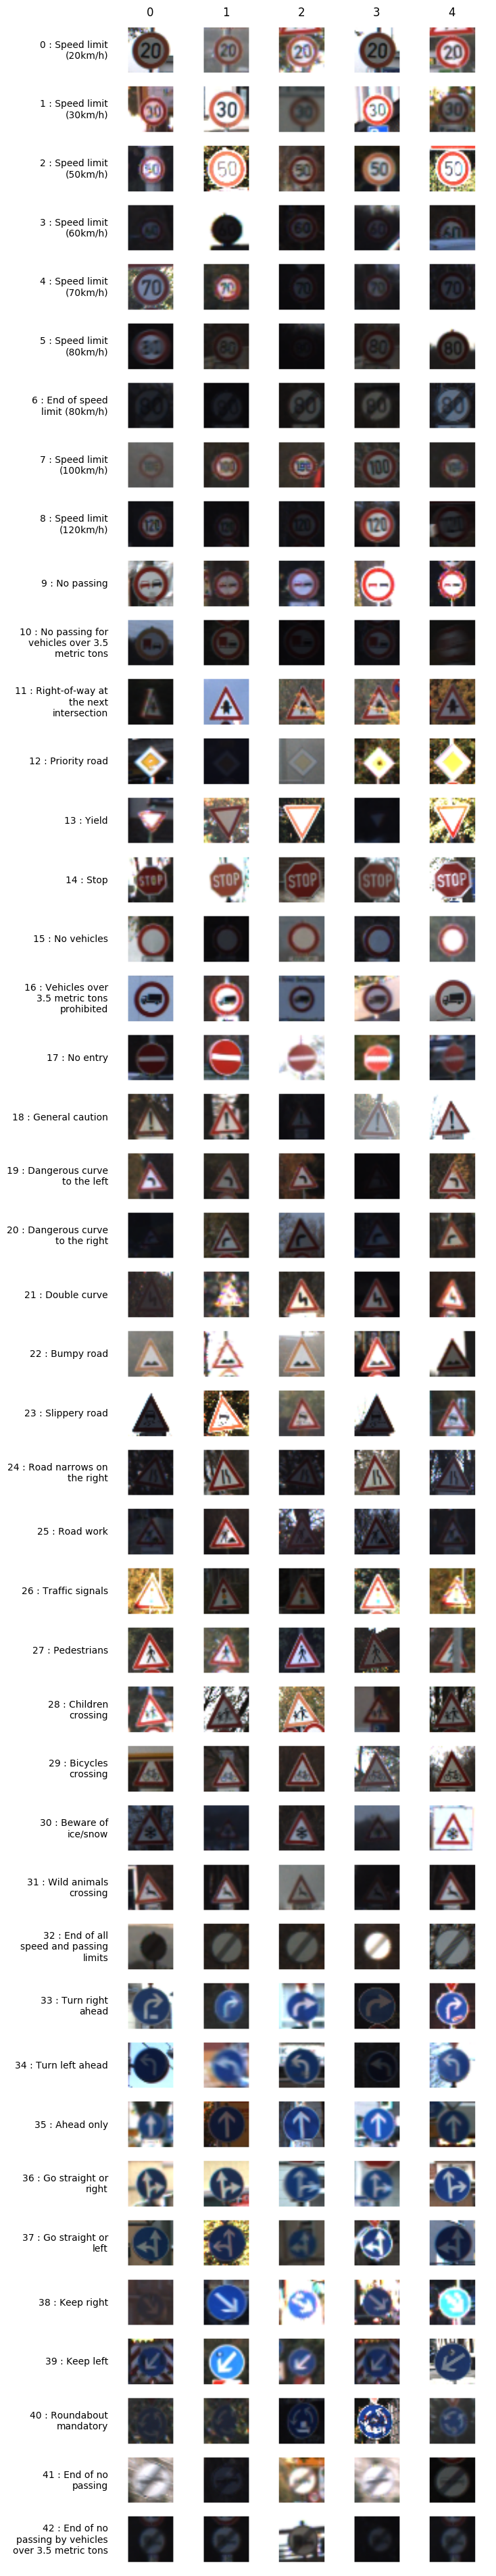

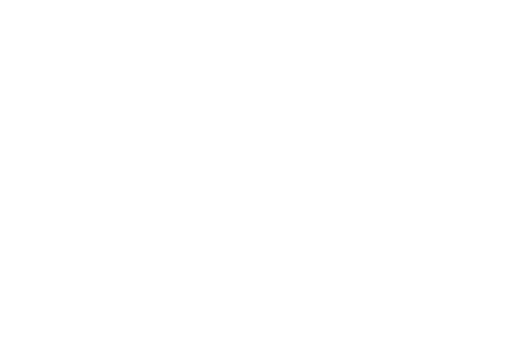

In [9]:
from textwrap import wrap

def get_n_random_images_with_class_c(n, c):
    indices = [a for a in range(len(y_train)) if y_train[a] == c]
    selected_indices = np.random.choice(indices, size=(n,))
    selected_images = X_train[selected_indices,:,:,:]
    return selected_images

def draw_n_images_of_each_class(n):
    plt.close('all')
    plt.axis('off')
    cols = n
    rows = n_classes
    images = []
    for i in range(n_classes):
        images.extend(get_n_random_images_with_class_c(n, i))
    f, axarr = plt.subplots(rows, cols, sharex='col', sharey='row')
    DPI = f.get_dpi()
    f.set_size_inches(64*cols/float(DPI) + 3 , 64*rows/float(DPI))
    plt.setp(axarr.flat, xticks=[], yticks=[])
    for i in range(len(images)):
        col = i % cols
        row = math.floor(i / cols)
        axarr[row, col].imshow(images[i], cmap='gray')
        axarr[row, col].spines['top'].set_visible(False)
        axarr[row, col].spines['right'].set_visible(False)
        axarr[row, col].spines['bottom'].set_visible(False)
        axarr[row, col].spines['left'].set_visible(False)
    for ax, ve in zip(axarr[0], range(n)):
        ax.set_title('{0}'.format(ve))
    for ax, c in zip(axarr[:, 0], range(n_classes)):
        label = '{0} : {1}'.format(c, class_def_map[str(c)])
        ax.set_ylabel('\n'.join(wrap(label, 20)), rotation = 0, horizontalalignment='right', verticalalignment='center')
    f.subplots_adjust(hspace=0.001, wspace= 0.001)
    plt.tight_layout()
    f.subplots_adjust(hspace=0.001, wspace= 0.001)

    display(f)
    plt.close(f)
    
draw_n_images_of_each_class(5)

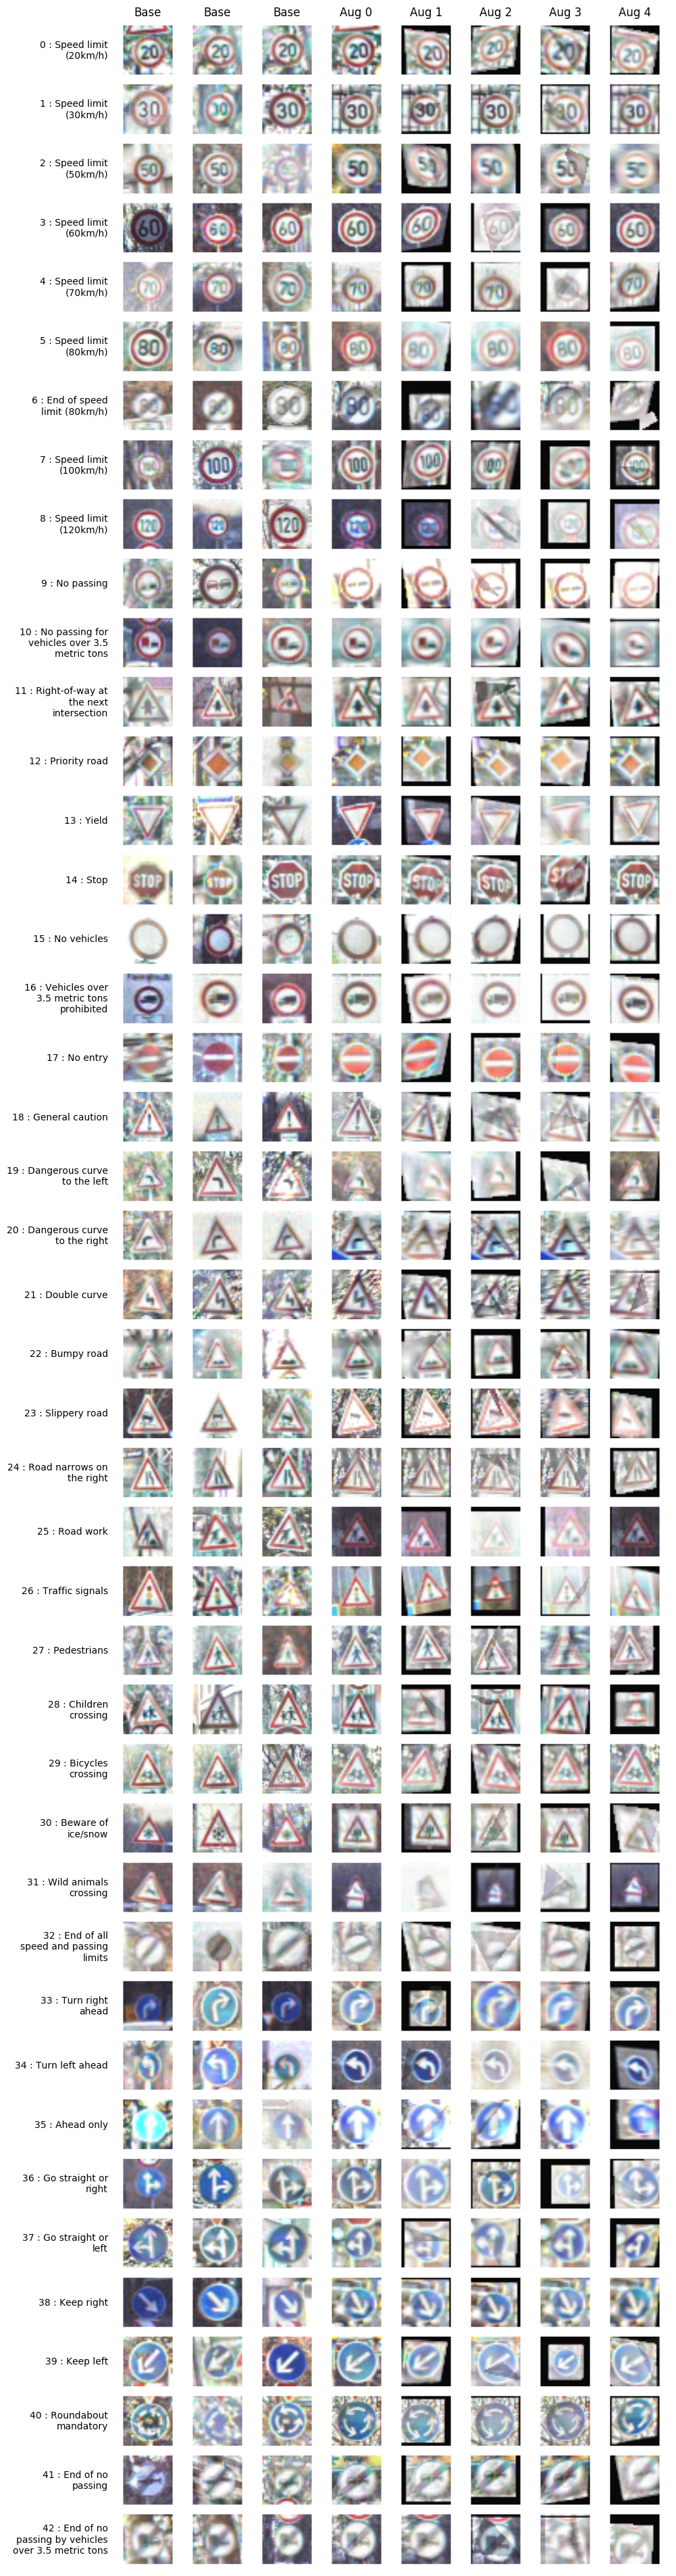

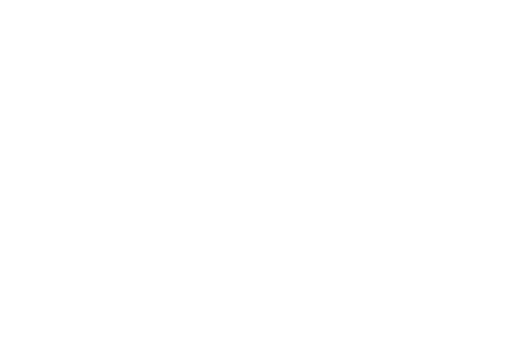

In [10]:
import random
import numpy as np

def get_random_image():
  index = random.randint(0, len(X_train))
  image = X_train[index].squeeze()
  return image

def scale(img, scale):
    return rotate(img, 0, scale)

def rotate(img, angle, scale = 1.0):
    center = tuple(np.array(img.shape[0:2])/2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(img, rotation_matrix, img.shape[0:2])

def translate(img, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(img, M, img.shape[0:2])

def shear(img, x, y):
    M = np.float32([[1, math.tan(x), 0], [math.tan(y), 1, 0]])
    return cv2.warpAffine(img, M, img.shape[0:2])

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
def clahe_l(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return final

def clahe_rgb(img):
    r, g, b = cv2.split(img)
    cr = clahe.apply(r)
    cg = clahe.apply(g)
    cb = clahe.apply(b)
    final = cv2.merge((cr, cg, cb))
    return final

def draw_polygon(img, pts, color, alpha):
    pts = pts.reshape((-1, 1, 2))
    hull = cv2.convexHull(pts)
    copy = img.copy()
    cv2.fillPoly(copy, [hull], color)
    return cv2.addWeighted(copy, alpha, img, 1-alpha, 0)

def hls_transform(img, h, l, s):
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    hls[..., 0] = (hls[..., 0]+h)
    hls[..., 1] = (hls[..., 1]+l)
    hls[..., 2] = (hls[..., 2]+s)
    rgb = cv2.cvtColor(hls, cv2.COLOR_HLS2BGR)
    return rgb

def motion_blur(img, amount):
    kernel = np.zeros((amount, amount))
    kernel[int((amount-1)/2), :] = np.ones(amount)
    kernel = kernel / amount
    return cv2.filter2D(img, -1, kernel)

def change_brightness(img, amount):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv[:,:,2] += amount
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def adjust_gamma(img, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

SCALE_PROB = 0.15
ROTATE_PROB = 0.15
TRANSLATE_PROB = 0.15
SHEAR_PROB = 0.1
POLYGON_PROB = 0.10
HLS_PROB = 0.0
BLUR_PROB = 0.05
CHANGE_BRIGHTNESS_PROB = 0.2
def augment(img):
    output = img
    if np.random.rand() < SCALE_PROB:
        output = scale(output, random.uniform(0.8, 1.2))
    if np.random.rand() < ROTATE_PROB:
        output = rotate(output, np.deg2rad(random.uniform(-10, 10)))
    if np.random.rand() < TRANSLATE_PROB:
        output = translate(output, random.randint(-3, 3), random.randint(-3, 3))
    if np.random.rand() < SHEAR_PROB:
        output = shear(output, np.deg2rad(random.uniform(-12, 12)), np.deg2rad(random.uniform(-12, 12)))
    if np.random.rand() < POLYGON_PROB:
        color = (10, 10, 10)
        pts = np.array([[random.randint(0, 32), random.randint(0, 32)], [random.randint(0, 32), random.randint(0, 32)],
                        [random.randint(0, 32), random.randint(0, 32)], [random.randint(0, 32), random.randint(0, 32)]],
                        np.int32)
        output = draw_polygon(output, pts, color,
                              random.uniform(0.1, 0.8))
    if np.random.rand() < HLS_PROB:
        output = hls_transform(output, random.randint(0, 10), random.randint(0, 10), random.randint(0, 10))
    if np.random.rand() < BLUR_PROB:
        output = motion_blur(output, random.randint(1, 5))
    if np.random.rand() < CHANGE_BRIGHTNESS_PROB:
        output = adjust_gamma(output, random.uniform(0.8, 3.0))
    return output

def repeat_augment(img, n):
    output = img
    for i in range(n):
        output = augment(output)
    return output

def augment_multiple(img, repeats, n):
    return [repeat_augment(img, repeats) for _ in range(n)]

def augment_multiple_preprocess(img, repeats, n):
    return [preprocess(repeat_augment(img, repeats)) for _ in range(n)]

def preprocess(img):
    return clahe_rgb(img)

def draw_n_augmented_images_of_each_class(n, x):
    plt.close('all')
    plt.axis('off')
    cols = n + x
    rows = n_classes
    images = []
    for i in range(n_classes):
        images.extend([preprocess(img) for img in get_n_random_images_with_class_c(x, i)])
        image = get_n_random_images_with_class_c(1, i)[0]
        augmented_images = augment_multiple_preprocess(image, 5, n - 1)
        images.extend([preprocess(image)])
        images.extend(augmented_images)

    f, axarr = plt.subplots(rows, cols, sharex='col', sharey='row')
    DPI = f.get_dpi()
    f.set_size_inches(64*cols/float(DPI) + 3 , 64*rows/float(DPI))
    plt.setp(axarr.flat, xticks=[], yticks=[])
    for i in range(len(images)):
        col = i % cols
        row = math.floor(i / cols)
        axarr[row, col].imshow(images[i], cmap='gray')
        axarr[row, col].spines['top'].set_visible(False)
        axarr[row, col].spines['right'].set_visible(False)
        axarr[row, col].spines['bottom'].set_visible(False)
        axarr[row, col].spines['left'].set_visible(False)
    for ax, ve in zip(axarr[0], range(cols)):
        label = "Base" if ve < x else 'Aug {0}'.format(ve-x)
        ax.set_title(label)
    for ax, c in zip(axarr[:, 0], range(n_classes)):
        label = '{0} : {1}'.format(c, class_def_map[str(c)])
        ax.set_ylabel('\n'.join(wrap(label, 20)), rotation = 0, horizontalalignment='right', verticalalignment='center')
    f.subplots_adjust(hspace=0.001, wspace= 0.001)
    plt.tight_layout()
    f.subplots_adjust(hspace=0.001, wspace= 0.001)

    display(f)
    plt.close(f)
    
draw_n_augmented_images_of_each_class(5, 3)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The data was preprocessed by applying Contrast Limited Adaptive Histogram Equalization (CLAHE) on the RGB channels of the image. This was selected after examining a subset of examples of each class and noticing that the strongest difference between the images was caused by differences in lighting. I also tried applying CLAHE to only the Lightness channel in LAB color space, but this seemed to produce worse results.

In [13]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

NUM_AUGMENT = 7

from sklearn.utils import shuffle, resample
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train)

X_train = np.vstack((X_train, np.vstack(augment_multiple(x, 2, NUM_AUGMENT) for x in X_train)))
y_train = np.hstack((y_train, np.repeat(y_train, NUM_AUGMENT, axis=0)))

### Preprocess the data here.
### Feel free to use as many code cells as needed.

X_train = np.float32([preprocess(x) for x in X_train])
X_validation = np.float32([preprocess(x) for x in X_validation])
X_test = np.float32([preprocess(x) for x in X_test])

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The training set was split into training and validation sets with an 80/20 split. The training set was then augmented as described below. The training, testing, and validation steps were then all preprocessed as described in question 1.

For augmenting the data, the intuition is that data augmentation should take an image of a certain class and apply transformations to it that make it similar to other images in the set while preserving the unique features of that class. This should improve the robustness of the neural network by giving it more examples of each class of images without training it on features that don't accurately allow it to distinguish between different classes.

For each image in the training set, 7 augmented images are produced. Each augmented image goes through two passes of augmentation. A single pass of augmentation can apply the following changes:
- 15% probability of scaling image to between 80% and 120% of original size; 
- 15% probability of rotating image by between -10 and 10 degrees;
- 15% probability of translating the image horizontally and vertically by up to 3 pixels;
- 10% probability of applying a shear transform with between -12 and 12 degrees;
- 10% probability of overlaying a polygon on the image with an opacity of between 0.1 and 0.8. The polygon is the convex hull of four randomly chosen points on the image;
- 5% probability of applying a horizontal motion blur on the image, with a convolution kernel size of between 1x1 and 5x5;
- 20% probability of adjusting the image gamma value to a value of between 0.8 and 3.0.

One disadvantage to this approach is that it can take an image that is a poor example of a particular class and augment it, further destroying the distinguishing features. A possible solution would be to run a first pass of the neural network without any data augmentation and use it to determine which samples are strong examples of each class, and then bias the data augmentation to prefer augmenting these images over images that are weak examples of the class. This may result in overfitting, though.

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [16]:
import os

import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import mnist
EPOCHS = 25
BATCH_SIZE = 256
DROPOUT_KEEP_PROB = 0.7

dropout_prob = tf.placeholder(tf.float32)

def testnet(images, is_training=True):
    net = slim.layers.conv2d(images, 8, [3,3], scope='fc1a')
    net = slim.layers.conv2d(images, 16, [3,3], scope='fc1b')
    net = slim.layers.max_pool2d(net, 2, 2, scope='fp1')
    net = slim.dropout(net, dropout_prob, is_training=is_training, scope='fdropout1')
    net = slim.layers.conv2d(net, 32, [3,3], scope='fc2a')
    net = slim.layers.conv2d(net, 64, [3,3], scope='fc2b')
    #Testing this:
    b1 = slim.layers.conv2d(net, 128, [3,3], scope='fc2c')
    b1 = slim.layers.max_pool2d(b1, 2, 2, scope='fp2')    
    #net = slim.layers.max_pool2d(net, [2,2], 2, scope='p2')
    b1 = slim.dropout(b1, dropout_prob, is_training=is_training, scope='fdropout2')    
    b1 = slim.layers.flatten(b1, scope='ff3') 
    
    b2 = slim.repeat(net, 2, slim.conv2d, 64, [3, 3], scope='fconv1')
    b2 = slim.max_pool2d(b2, [2, 2], scope='fpool1')
    b2 = slim.repeat(b2, 2, slim.conv2d, 128, [3, 3], scope='fconv2')
    b2 = slim.max_pool2d(b2, [2, 2], scope='fpool2')
    b2 = slim.repeat(b2, 4, slim.conv2d, 256, [3, 3], scope='fconv3')
    b2 = slim.max_pool2d(b2, [2, 2], scope='fpool3')
    b2 = slim.repeat(b2, 4, slim.conv2d, 512, [3, 3], scope='fconv4')
    b2 = slim.max_pool2d(b2, [2, 2], scope='fpool4')
    b2 = slim.repeat(b2, 4, slim.conv2d, 512, [3, 3], scope='fconv5')
    #b2 = slim.max_pool2d(b2, [2, 2], scope='fpool5')
    b2 = slim.layers.flatten(b2, scope='ffx')
    # Use conv2d instead of fully_connected layers.
    b2 = slim.layers.fully_connected(b2, 4096, scope='ffc6')
    
    b1 = slim.layers.fully_connected(b1, 1024, scope='ffully_connected4')
    net = tf.concat([b1, b2], 3)
    net = slim.dropout(net, dropout_prob, is_training=is_training, scope='fdrouput4')
    net = slim.layers.fully_connected(net, 43, activation_fn=None, scope='ffully_connected5')
    return net

def lenet(images, is_training=True):
    net = slim.layers.conv2d(images, 8, [3,3], scope='c1a')
    net = slim.layers.conv2d(net, 16, [3,3], scope='c1b')
    net = slim.layers.max_pool2d(net, 2, 2, scope='p1')
    net = slim.dropout(net, dropout_prob, is_training=is_training, scope='dropout1')
    net = slim.layers.conv2d(net, 32, [3,3], scope='c2a')
    net = slim.layers.conv2d(net, 64, [3,3], scope='c2b')
    #Testing this:
    net = slim.layers.conv2d(net, 128, [3,3], scope='c2c')
    net = slim.layers.max_pool2d(net, 2, 2, scope='p2')    
    net = slim.dropout(net, dropout_prob, is_training=is_training, scope='dropout2')    
    net = slim.layers.flatten(net, scope='f3')
    net = slim.layers.fully_connected(net, 1024, scope='fully_connected4')
    net = slim.dropout(net, dropout_prob, is_training=is_training, scope='drouput4')
    net = slim.layers.fully_connected(net, 43, activation_fn=None, scope='fully_connected5')
    return net

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

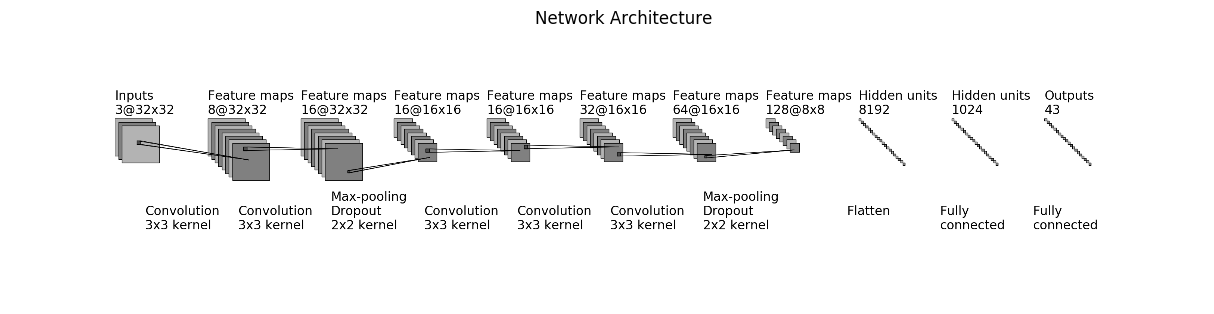

In [78]:
"""For some reason the markdown doesn't show the image when I export to HTML, so I'm displaying it using a code block. >_< """
def draw_network_arch():
    f = plt.figure()
    plt.title("Network Architecture")
    f.set_size_inches(15, 5)
    plt.axis('off')
    architecture_diagram = cv2.imread("network_arch.png")
    plt.imshow(architecture_diagram, cmap='gray')
    display(f)
    plt.close(f)

draw_network_arch()


See above for a diagram of the network.

All of the convolution layers use a 3x3 kernel with SAME padding and a stride of 1, so they don't result in a change in the width or height of the layers. The max pooling layers use a 2x2 kernel with VALID padding and a stride of 2, which results in an output with half the width and height of the previous layer. Each max pooling layer is followed immediately by a dropout step.

After the final max pooling and dropout, the network is flattened, and a fully connected layer reduces the number of features to 1024. The final fully connected layer further reduces the features to 43, which is the number of classes in the input set.

In [17]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [18]:
rate = 0.001

logits = lenet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
from datetime import datetime
print(datetime.now().time())
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob: DROPOUT_KEEP_PROB})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("TIME {} \t EPOCH {} \t Validation Accuracy = {:.6f}".format(datetime.now().time(), i+1, validation_accuracy))
        
    saver.save(sess, 'lenet')
    print("Model saved")

04:43:44.435601
Training...

TIME 04:45:48.861142 	 EPOCH 1 	 Validation Accuracy = 0.901765
TIME 04:47:48.710599 	 EPOCH 2 	 Validation Accuracy = 0.988575
TIME 04:49:48.505914 	 EPOCH 3 	 Validation Accuracy = 0.995512
TIME 04:51:48.305422 	 EPOCH 4 	 Validation Accuracy = 0.996838
TIME 04:53:48.108678 	 EPOCH 5 	 Validation Accuracy = 0.995512
TIME 04:55:47.952099 	 EPOCH 6 	 Validation Accuracy = 0.997144
TIME 04:57:47.740653 	 EPOCH 7 	 Validation Accuracy = 0.997450
TIME 04:59:47.570140 	 EPOCH 8 	 Validation Accuracy = 0.997552
TIME 05:01:47.416602 	 EPOCH 9 	 Validation Accuracy = 0.998164
TIME 05:03:47.244281 	 EPOCH 10 	 Validation Accuracy = 0.998470
TIME 05:05:47.126660 	 EPOCH 11 	 Validation Accuracy = 0.998470
TIME 05:07:46.913161 	 EPOCH 12 	 Validation Accuracy = 0.998164
TIME 05:09:46.718218 	 EPOCH 13 	 Validation Accuracy = 0.998470
TIME 05:11:46.594854 	 EPOCH 14 	 Validation Accuracy = 0.998980
TIME 05:13:46.391013 	 EPOCH 15 	 Validation Accuracy = 0.998470
TIME 

In [25]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    test_accuracy = evaluate(X_test, y_test)

print("Test accuracy: {:.6f}".format(test_accuracy))

Test accuracy: 0.984481


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The model was trained using AdamOptimizer. The following hyperparameter settings were chosen:

- Batch size of 256.
- Trained for 25 epochs.
- Dropout keep probability of 0.7.
- Learning rate of 0.001.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with a basic implementation of LeNet using the tf-slim library, which produced about 96% accuracy. I used this as the baseline when testing out and adding different data augmentations.

After I settled on an approach for data augmentations, I examined and implemented different network architectures, including VGG-19 and an inception-based architecture. However, I found that these produced worse results or took much longer to train, so I eventually went back to the LeNet-based architecture. After adding the data augmentation and an additional convolution layer with a depth of 128, I was able to get the validation accuracy to 98.9%. At this point, I noticed that my implementation of dropout was incorrect (it wasn't setting the dropout keep probability to 1 when evaluating the network). After correcting this, the validation accuracy increased to about 99.75%. Further tuning of the hyperparameters allowed the network to reach a validation accuracy of 99.91% and an accuracy of 98.5% on the test set. 

If I had more time, I would have liked to experiment more with different network architectures, optimizers, and techniques such as batch normalization and gradient noise. I feel that this project suffers somewhat from having too many knobs to turn (data augmentation, network architecture, hyperparameters, optimizers, etc.), and given the limited amount of time, it is difficult to explore each of these methods of improving the network in depth. Overall, I'm happy with the final results, even though I'm sure there is a lot that could be done to further improve the network.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

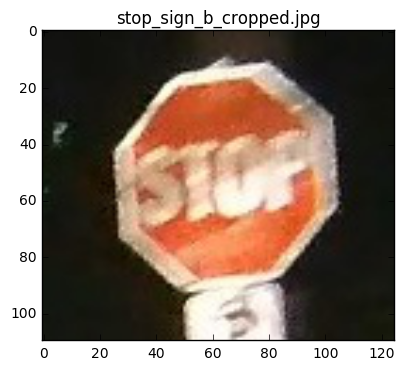

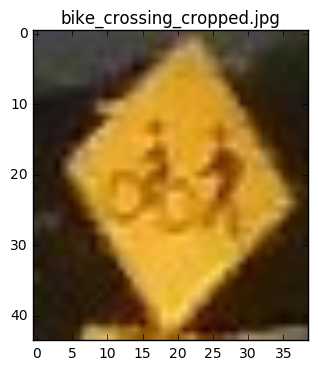

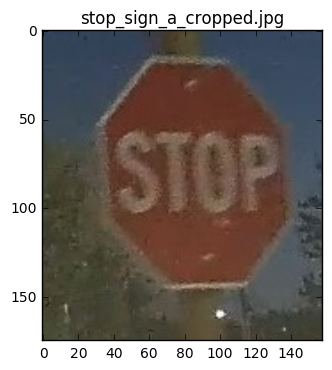

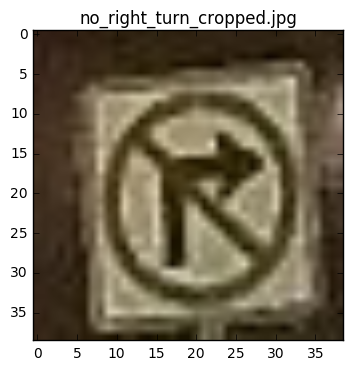

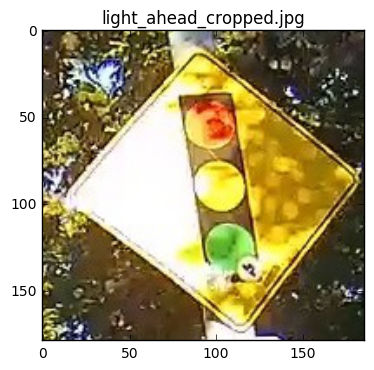

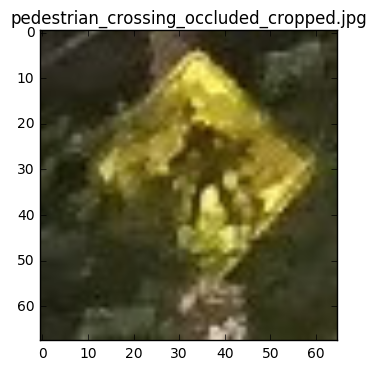

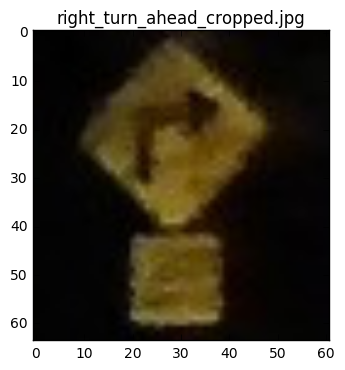

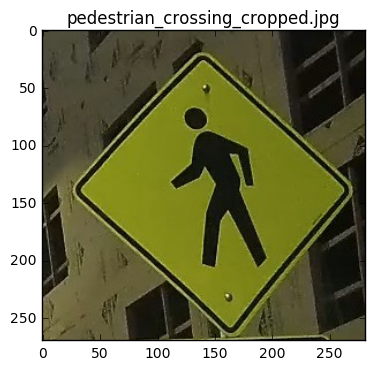

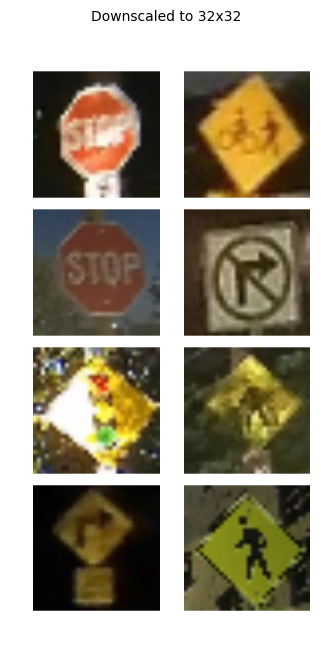

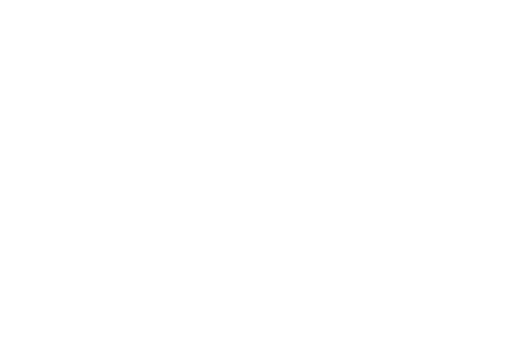

In [34]:
import os
image_paths = os.listdir("new_images/")

new_images = []

for image_path in image_paths:
    image = cv2.cvtColor(cv2.imread('new_images/' + image_path), cv2.COLOR_BGR2RGB)
    scaled_image = cv2.resize(image, (32, 32))
    new_images.append(scaled_image)
    draw(image, image_path)

draw_multiple(new_images, "Downscaled to 32x32")

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The above images are all taken from my car's dashboard camera while driving around Seattle. They include:

- Two pictures of stop signs; one at night and one during the day. These are present in the training set and should be recognized.
- A bike/pedestrian crossing sign. The equivalent in the training set would be 27 (Pedestrian) and 29 (Bicycles crossing), but my image is yellow and the German one is white with a red outline. I expect this to not be recognized.
- A 'no right turns' sign. There is no real equivalent in the training set. It will be interesting to see what happens here, as it contains a square, a circle with a line through it, and an arrow.
- A 'traffic light ahead' warning sign. The equivalent in the training set would be 26 (Traffic signals), but the color and shape of the German sign are different. Furthermore, the lighting on my image is uneven. Part of the sign is lit by the sun and appears white, part of the sign is normal yellow, and part of the sign is shaded by a nearby tree, causing it to appear brown. This will likely not get classified correctly.
- Two pedestrian crossing signs. One is clear, the other is occluded by some bushes or trees. The equvalent in the training set would be 27 (Pedestrians), but the shape and color are different.
- A 'turn right ahead' sign. The equivalent in the training set is 33 (turn right ahead), but the color and shape of the German sign are different, so it would only be able to match based on the arrow. I do not expect the network to classify this correctly.



In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [66]:
def get_predictions(X_data):
    sess = tf.get_default_session()
    predictions = np.zeros((len(X_data), n_classes))
    accuracy = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data, dropout_prob: 1.0})
    return accuracy

def draw_barh(image, indices, probabilities):
    plt.figure()
    
    f, axarr = plt.subplots(1, 2)
    f.set_size_inches(8, 2.5)
    
    labels = ["{} : {}".format(index, class_def_map[str(index)]) for index in indices]
    labels = ['\n'.join(wrap(label, 20)) for label in labels]

    y_pos = np.arange(len(indices))
    axarr[0].barh(y_pos, probabilities, align='center',
        color='green', ecolor='black')
    axarr[0].set_xlim([0, 1])
    axarr[0].set_yticks(y_pos)
    axarr[0].set_yticklabels(labels)
    axarr[0].invert_yaxis()  # labels read top-to-bottom
    
    axarr[1].imshow(image)
    axarr[1].axis('off')
    plt.tight_layout()

    plt.show()
    
X_new = np.array([preprocess(image) for image in new_images])
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    predictions = get_predictions(X_new)
    top_predictions = sess.run(tf.nn.top_k(tf.constant(predictions), k=5))



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model correctly predicted 3 of the 8 signs, so I guess it is 37.5% accurate. It was able to get both stop signs and the clear pedestrian crossing sign, but failed at the other ones.

This is not surprising, as all of the signs except the stop sign are of different colors and shapes compared to the German traffic signs. Furthermore, I intentionally chose signs with difficult lighting conditions (the traffic signs one) or occlusions (the pedestrian crossing one) in order to make it more difficult for the network to classify them.

In [67]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

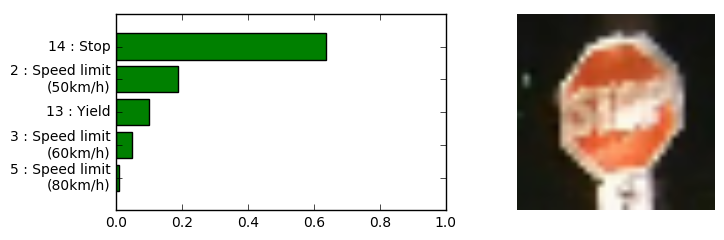

0.6375117897987366 	 14 : Stop
0.1885288655757904 	 2 : Speed limit (50km/h)
0.09808763116598129 	 13 : Yield
0.049071814864873886 	 3 : Speed limit (60km/h)
0.008640991523861885 	 5 : Speed limit (80km/h)


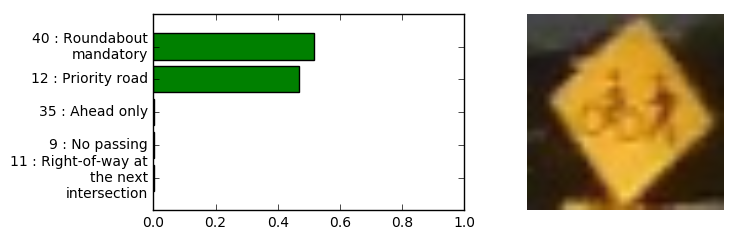

0.5180127024650574 	 40 : Roundabout mandatory
0.46780720353126526 	 12 : Priority road
0.0028276205994188786 	 35 : Ahead only
0.0025663769338279963 	 9 : No passing
0.001822026213631034 	 11 : Right-of-way at the next intersection


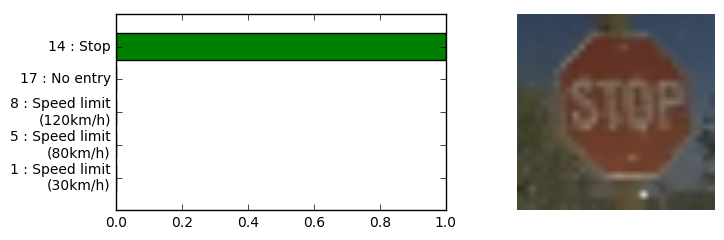

0.9999998807907104 	 14 : Stop
1.3948576338407292e-07 	 17 : No entry
3.3612590488729666e-09 	 8 : Speed limit (120km/h)
2.1629560364999634e-09 	 5 : Speed limit (80km/h)
2.0684904900036827e-09 	 1 : Speed limit (30km/h)


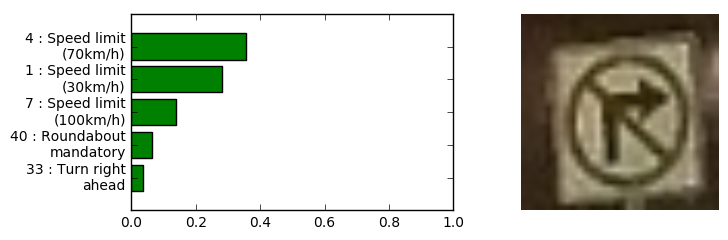

0.3564336895942688 	 4 : Speed limit (70km/h)
0.2798291742801666 	 1 : Speed limit (30km/h)
0.1393682062625885 	 7 : Speed limit (100km/h)
0.06354223191738129 	 40 : Roundabout mandatory
0.03700719401240349 	 33 : Turn right ahead


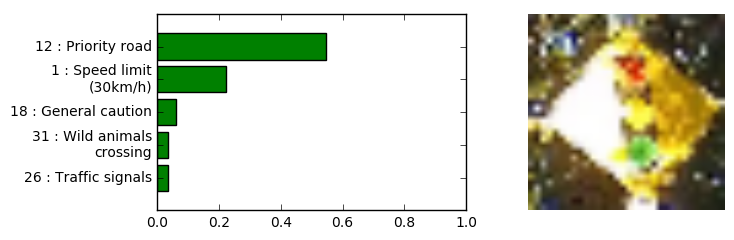

0.5467379093170166 	 12 : Priority road
0.2212582230567932 	 1 : Speed limit (30km/h)
0.06087525933980942 	 18 : General caution
0.03497911989688873 	 31 : Wild animals crossing
0.03457370027899742 	 26 : Traffic signals


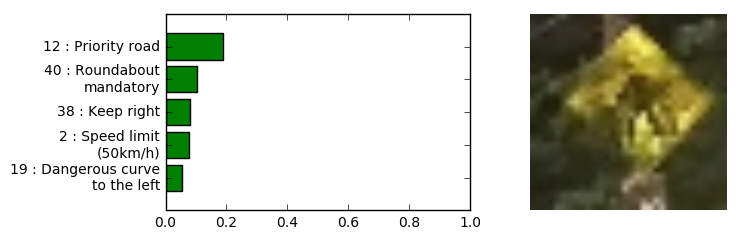

0.18697230517864227 	 12 : Priority road
0.10340028256177902 	 40 : Roundabout mandatory
0.07964541018009186 	 38 : Keep right
0.07788923382759094 	 2 : Speed limit (50km/h)
0.054632388055324554 	 19 : Dangerous curve to the left


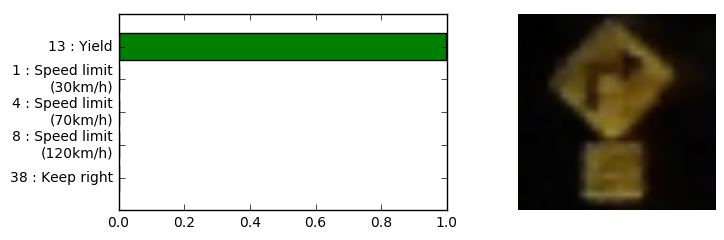

0.997136116027832 	 13 : Yield
0.00121634965762496 	 1 : Speed limit (30km/h)
0.0008551630889996886 	 4 : Speed limit (70km/h)
0.00048533285735175014 	 8 : Speed limit (120km/h)
7.94519146438688e-05 	 38 : Keep right


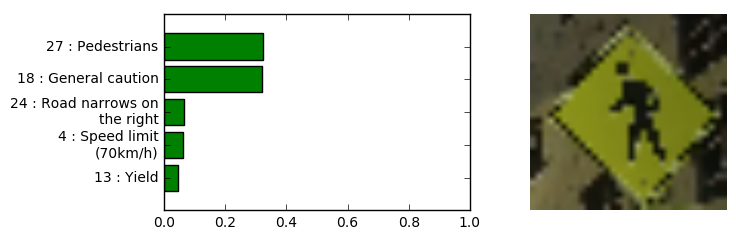

0.32213738560676575 	 27 : Pedestrians
0.3189782202243805 	 18 : General caution
0.06511031091213226 	 24 : Road narrows on the right
0.06116271764039993 	 4 : Speed limit (70km/h)
0.04419051855802536 	 13 : Yield


In [71]:
labels = np.argmax(predictions, axis=1)
for i in range(len(new_images)):
    draw_barh(new_images[i], top_predictions.indices[i], top_predictions.values[i])
    for j in range(len(top_predictions.indices[i])):
        index = top_predictions.indices[i][j]
        print("{} \t {} : {}".format(top_predictions.values[i][j], index, class_def_map[str(index)]))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model was able to predict both stop signs with a high confidence (63% and 99%).

It incorrectly classified the bicycle/pedestrian crossing as a "Roundabout mandatory" with a confidence of 51.9%. The correct prediction doesn't appear in the top 5.

It incorrectly classified the "No Right Turn" sign as a "Speed limit (70km/h)" sign with a low confidence (35.6%). The correct prediction doesn't appear in the top 5 here either.

It incorrectly classified the "Traffic signals ahead" sign as a "Priority road" sign with a confidence of 54.7%. The correct prediction was the 5th highest, with a confidence of only 3.5%. This is somewhat reasonable, as the US warning sign is a yellow diamond, and the German "Priority road" sign is the only sign in the training set that is also a yellow diamond shape.

It incorrectly classified the occluded pedestrian crossing sign as a "Priority road" with a low confidence (18.7%). The correct prediction doesn't appear in the top 5. Again, this could be due to the fact that the only German sign that is a yellow diamond shape is the "Priority road" sign.

It incorrectly believed that the "Right Turn Ahead" sign was a yield sign with a very high confidence (99.7%). This is strange, because it looks nothing like the yield sign. This could be caused by the fact that yield signs are one of the most common classes in the training set.

Finally, it correctly classified the clear Pedestrian crossing sign, but with a low confidence of 32.2%, which was very close to the 2nd guess of "General caution" which had a confidence of 31.9%. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.